# Regularization Total [30 Marks]

## Run the following cell to read the California Housing dataset.

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Use all house features (X): [10 Marks] (2 Marks per each step)

### ('MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude')
### y is the price

### Use train/test split and train the model on the training data then test on the test data
### Create polynomial features.
### Standardize the data.
### Use linear regression model with polynomial features.

### Step 1: 
#### Create polynomial features with degree 3
#### train/test split using test_size=0.33 and random_state=42

In [7]:
X_df = df.loc[:, df.columns != 'PRICE']

X = X_df.to_numpy()
y = df[['PRICE']].to_numpy()

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

### Step 2: 
##### Create a StandardScaler
##### Standrdize the training data
##### Standrdize the test data
##### Note: You fit StandardScaler only on the training data then use it to transfrom both trainig and test data.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: 
##### Create a LinearRegression model
##### Train the linear regression model using the standardized training data

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

### Step 4: 
##### Make a prediction using the standrdized trainig data 
##### Make a prediction using the standrdized test data 

In [12]:
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

### Step 5: Evaluate the model on training and test data using r2_score

In [13]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("Third order polynomial:")
print("r2_score Train:", r2_train)
print("r2_score Test:", r2_test)

Third order polynomial:
r2_score Train: 0.7453087038162005
r2_score Test: -13.948448207554904


## Repeat the above steps and use Ridge Regression with regularization parameter = 0.1 [10 Marks] (2 Marks per each step)

In [18]:
X_poly_ridge = poly_features.fit_transform(X)
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_poly_ridge, y, test_size=0.33, random_state=42)
ridge_scaler = StandardScaler()
X_train_ridge_scaled = ridge_scaler.fit_transform(X_train_ridge)
X_test_ridge_scaled = ridge_scaler.transform(X_test_ridge)

In [19]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_ridge_scaled, y_train_ridge)

Ridge(alpha=0.1)

In [20]:
y_pred_test_ridge = ridge_model.predict(X_test_ridge_scaled)
y_pred_train_ridge = ridge_model.predict(X_train_ridge_scaled)

In [21]:
r2_train_ridge = r2_score(y_train_ridge, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test_ridge, y_pred_test_ridge)
print("Third order polynomial:")
print("r2_score Train:", r2_train_ridge)
print("r2_score Test:", r2_test_ridge)

Third order polynomial:
r2_score Train: 0.7127253861433246
r2_score Test: 0.6970801746076316


## Repeat the above steps and use Lasso Regression with regularization parameter = 0.1

In [22]:
X_poly_lasso = poly_features.fit_transform(X)
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_poly_lasso, y, test_size=0.33, random_state=42)
lasso_scaler = StandardScaler()
X_train_lasso_scaled = lasso_scaler.fit_transform(X_train_lasso)
X_test_lasso_scaled = lasso_scaler.transform(X_test_lasso)

In [23]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_lasso_scaled, y_train_lasso)

Lasso(alpha=0.1)

In [24]:
y_pred_test_lasso = lasso_model.predict(X_test_lasso_scaled)
y_pred_train_lasso = lasso_model.predict(X_train_lasso_scaled)

In [25]:
r2_test_lasso = r2_score(y_test_lasso, y_pred_test_lasso)
r2_train_lasso = r2_score(y_train_lasso, y_pred_train_lasso)
print("Third order polynomial:")
print("r2_score Train:", r2_train_lasso)
print("r2_score Test:", r2_test_lasso)

Third order polynomial:
r2_score Train: 0.5075734199953046
r2_score Test: 0.5060845324628218


## Compare model coefficients for all the above three models (Linear, Ridge, and Lasso)

In [26]:
df_coeff = pd.DataFrame({'Linear Reg.':lr.coef_.ravel(),
                         'Ridge Reg.':ridge_model.coef_.ravel(),
                         'Lasso Reg.':lasso_model.coef_.ravel()})

In [27]:
print(df_coeff.to_markdown())

|     |   Linear Reg. |   Ridge Reg. |   Lasso Reg. |
|----:|--------------:|-------------:|-------------:|
|   0 |   -14.0067    |  -4.72853    |   0          |
|   1 |   165.774     |  -2.56715    |   0          |
|   2 |   138.634     |   3.0218     |  -0          |
|   3 |    -1.47707   |  -1.69999    |  -0          |
|   4 |   191.174     |   0.217505   |   0          |
|   5 |   866.107     |   0.864762   |  -0          |
|   6 |   985.129     |   3.29593    |  -0          |
|   7 |   509.888     |   0.144723   |  -0          |
|   8 |    25.8882    |   2.91101    |   0          |
|   9 |    -4.77599   |  -0.829608   |   0          |
|  10 |    -2.24165   |  -1.19101    |   0          |
|  11 |     4.82866   |  -1.35272    |   0          |
|  12 |     2.02057   |  -1.35893    |   0          |
|  13 |   388.295     |  -2.70317    |  -0          |
|  14 |   158.838     |  -3.54175    |   0          |
|  15 |   192.113     |  -0.308111   |  -0          |
|  16 |    -7.27555   |  -2.

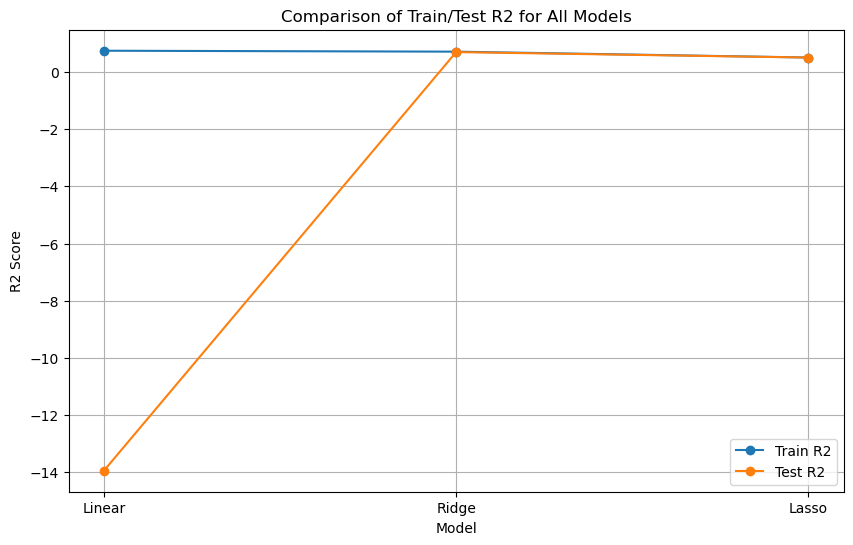

In [30]:
r2_scores = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso"],
    "Train R2": [r2_train, r2_train_ridge, r2_train_lasso],
    "Test R2": [r2_test, r2_test_ridge, r2_test_lasso]
})

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(r2_scores["Model"], r2_scores["Train R2"], marker='o', label="Train R2")
plt.plot(r2_scores["Model"], r2_scores["Test R2"], marker='o', label="Test R2")

plt.title("Comparison of Train/Test R2 for All Models")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.grid(True)
plt.legend()
plt.show()
